In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import csv

In [ ]:
df = pd.read_csv('/content/data.csv')
testd = pd.read_csv('/content/test.csv')

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  6.150553  212.819377  15017.747281     5.544436  319.494952    279.447066   
1       NaN  180.680598   8692.538152     8.671793  396.528754    534.339086   
2  5.344117  198.379144  13492.840835     6.559265  328.648845    591.363369   
3  7.647872  160.774353  29000.589712     7.217409         NaN    438.800961   
4  8.129586  177.898967  27834.217696     9.006008  334.438539    397.021428   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       12.850506        75.028793   4.810537           0  
1       10.299787        87.652015   3.913602           0  
2       14.084388        61.392983   4.104699           1  
3       13.182501        67.099969   3.078673           1  
4       15.936262        81.390758   3.362537           0

In [ ]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
2615       NaN  202.886990  24518.574297     7.217408  360.154113   
2616  7.248991  184.071034  33123.442980     7.186173  322.365661   
2617  5.596930  162.724672  23930.374549     7.456557         NaN   
2618  5.924540  186.620068  44376.187382     6.614180  341.637774   
2619  7.918087  175.337240  29565.711108     7.432180         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2615    492.352061       16.743289        72.710127   4.174569           0  
2616    345.356576       15.164134        68.847544   4.255980           0  
2617    535.339561       19.174739        54.966317   3.506765           0  
2618    273.446838       12.758115        59.456691   4.224343           0  
2619    322.533423       11.309245        70.116746   4.640043           1

In [ ]:
df.shape

(2620, 10)

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.isnull().sum()

ph                 386
Hardness             0
Solids               0
Chloramines          0
Sulfate            621
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
from scipy import stats
skewness = df.select_dtypes(include=['float64']).apply(lambda x: stats.skew(x.dropna()))

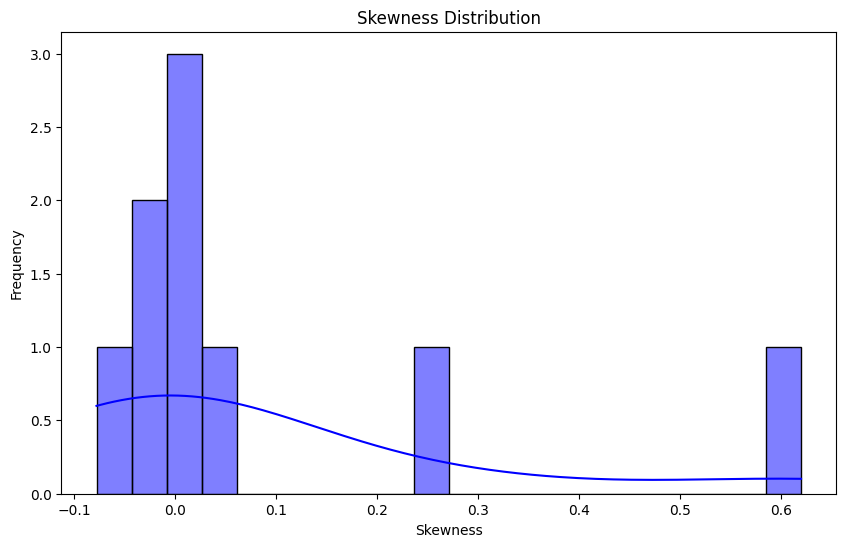

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(skewness, bins=20, kde=True, color='blue')
plt.title('Skewness Distribution')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()

In [ ]:
skewness1 = df.skew()

In [ ]:
print(skewness1)

ph                 0.048686
Hardness          -0.042585
Solids             0.620542
Chloramines        0.009958
Sulfate           -0.039596
Conductivity       0.265221
Organic_carbon     0.019216
Trihalomethanes   -0.078196
Turbidity         -0.005459
Potability         0.432932
dtype: float64


In [ ]:
df1 = df.fillna(method='ffill',axis=0)

In [ ]:
df1.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2620.000000  2620.000000   2620.000000  2620.000000  2620.000000   
mean      7.078161   196.200911  21973.377381     7.130793   333.061026   
std       1.602887    33.137494   8702.501618     1.584109    42.609903   
min       0.000000    47.432000    728.750830     0.352000   129.000000   
25%       6.096167   176.734160  15715.740730     6.125502   306.981994   
50%       7.022285   196.926487  20926.882155     7.131972   331.618571   
75%       8.039820   216.657847  27216.632550     8.105680   359.930566   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2620.000000     2620.000000      2620.000000  2620.000000  2620.000000  
mean     425.749573       14.292469        66.206358     3.965649     0.394275  
std       81.038498        3.272972        16.201224     0.783198     0.488788  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.842780       12.067417        55.704435     3.441806     0.000000  
50%      421.884968       14.220645        66.481388     3.962234     0.000000  
75%      481.089353       16.541731        77.125356     4.497554     1.000000  
max      753.342620       27.006707       124.000000     6.739000     1.000000

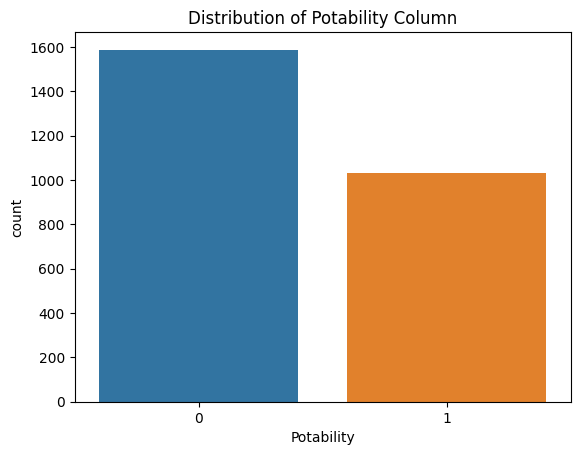

In [ ]:
sns.countplot(x='Potability', data=df1)
plt.title('Distribution of Potability Column')
plt.show()

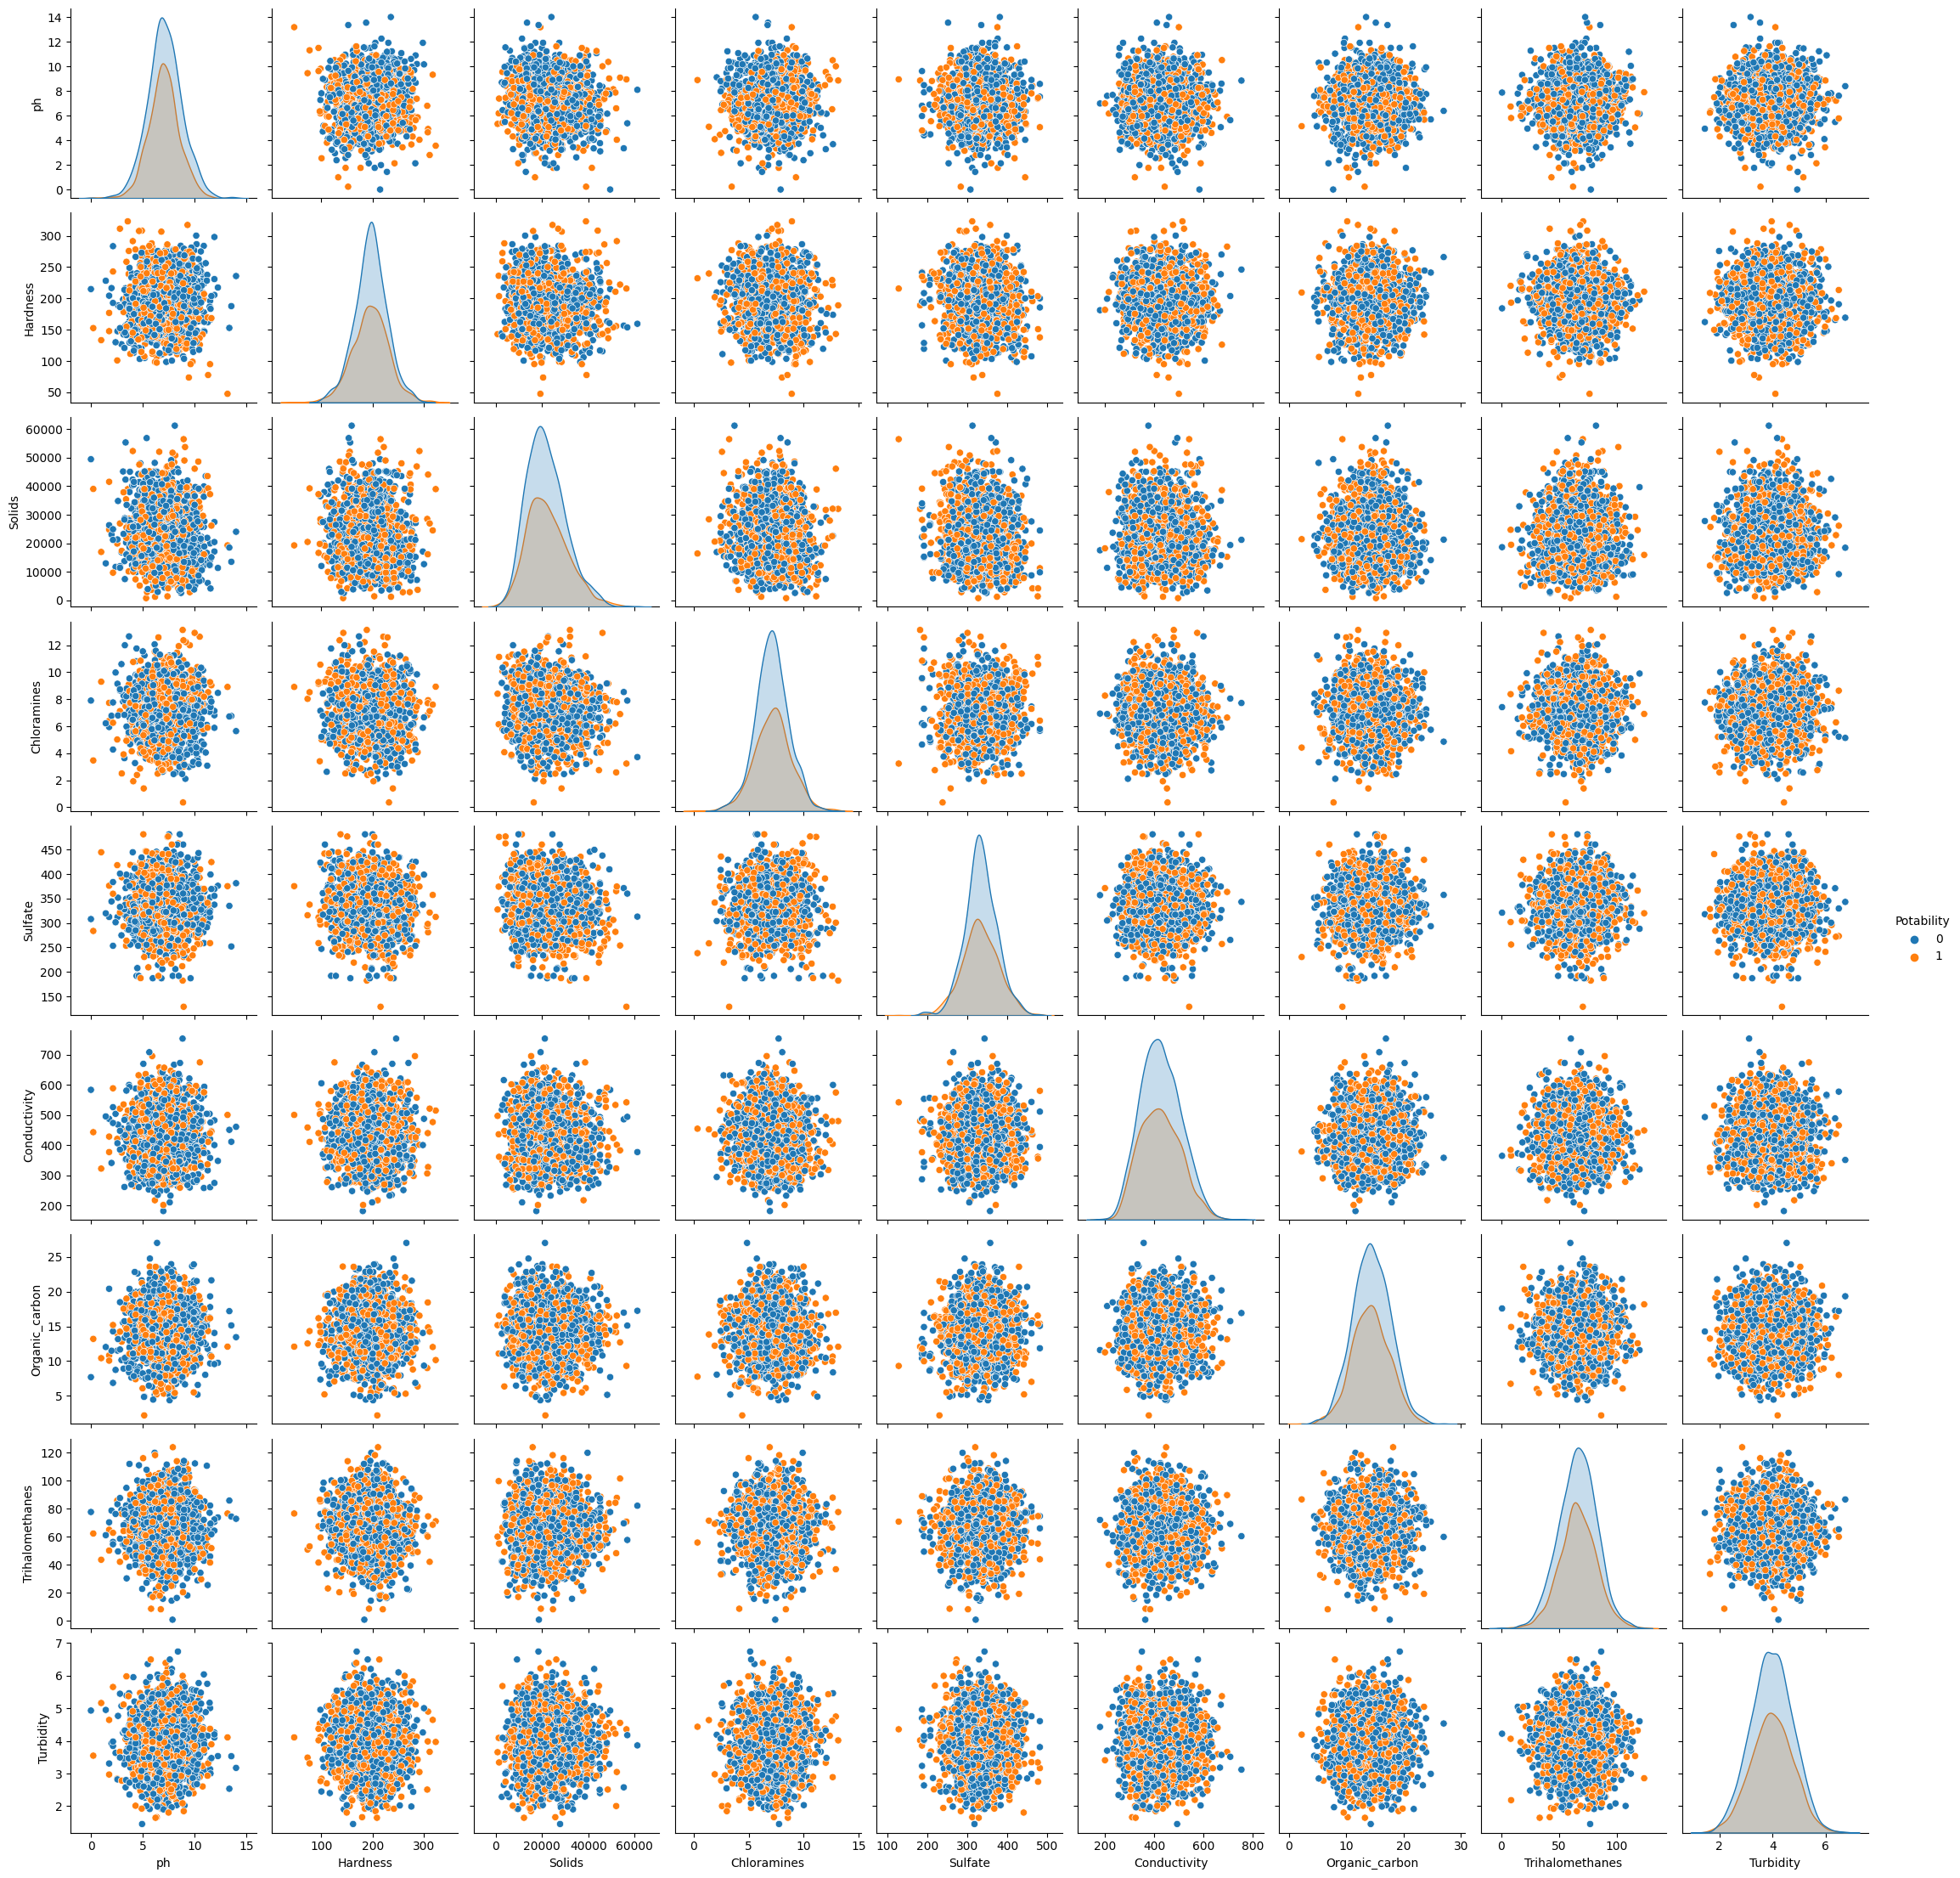

In [ ]:
sns.pairplot(df1, hue='Potability')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2234 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1999 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns

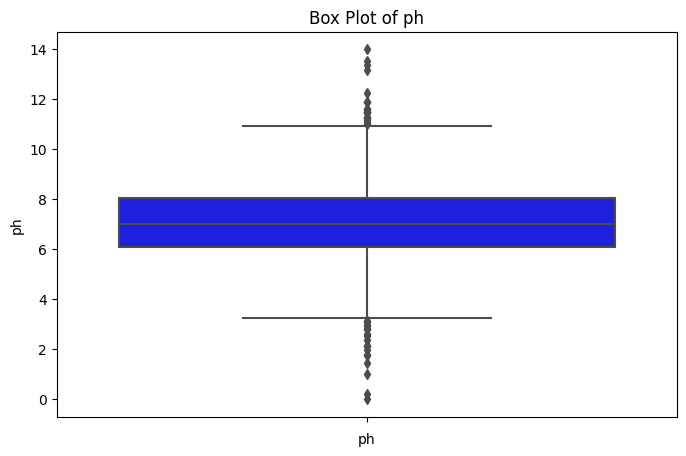

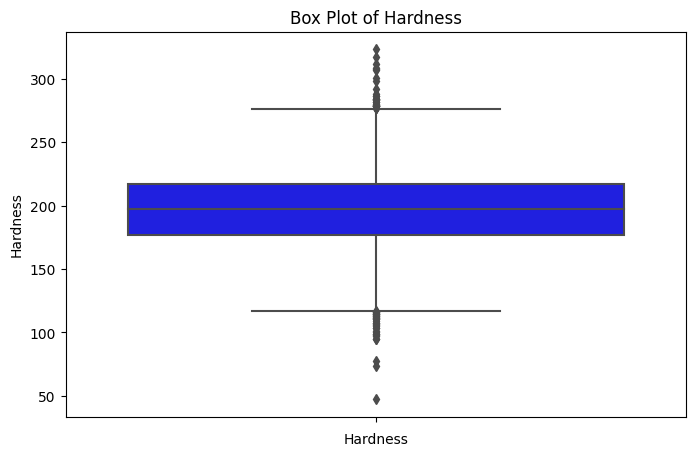

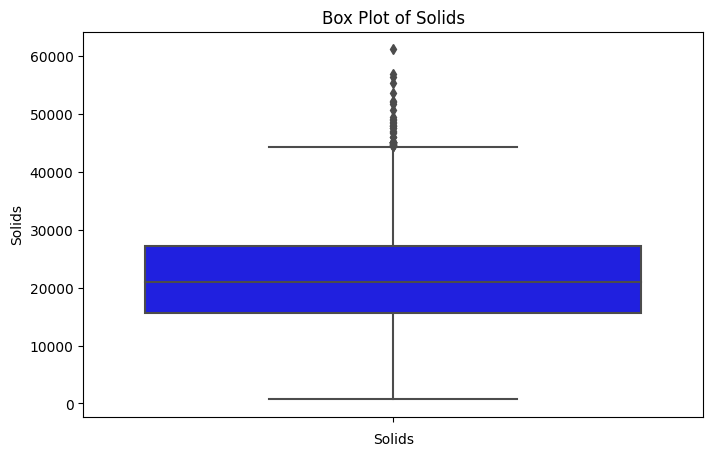

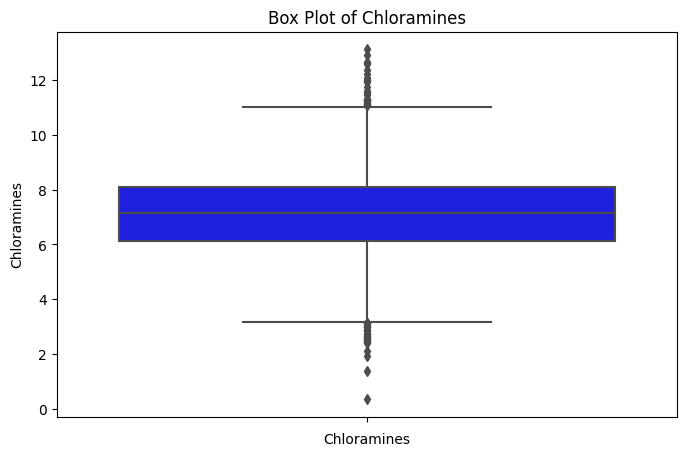

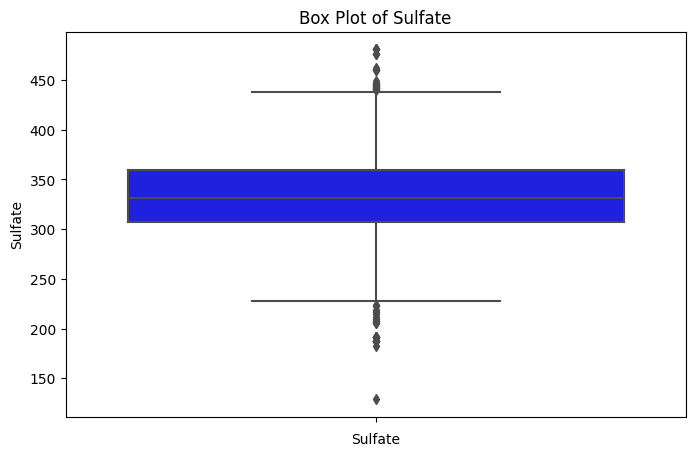

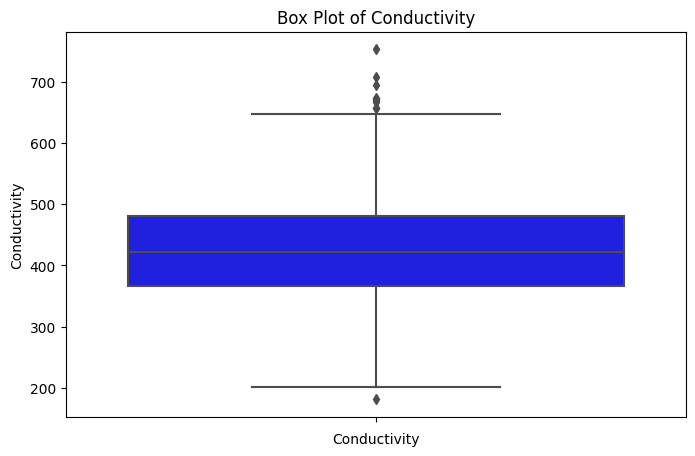

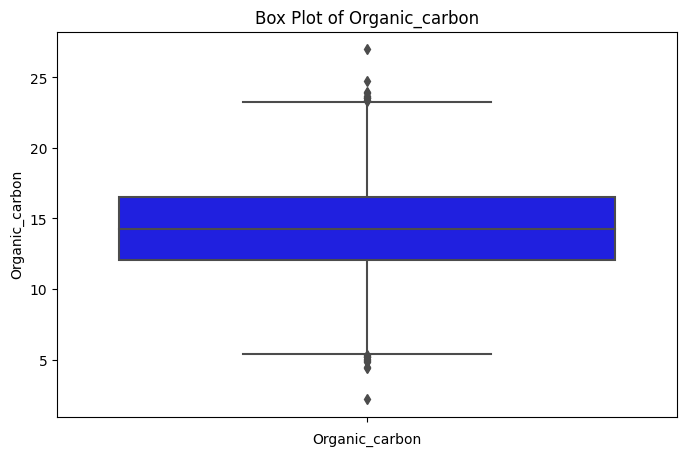

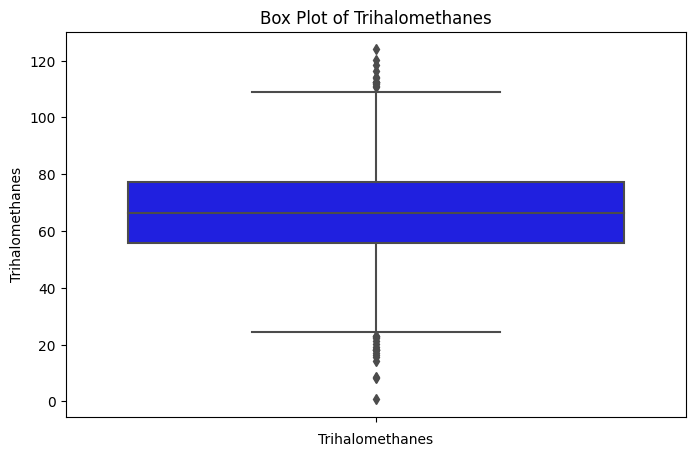

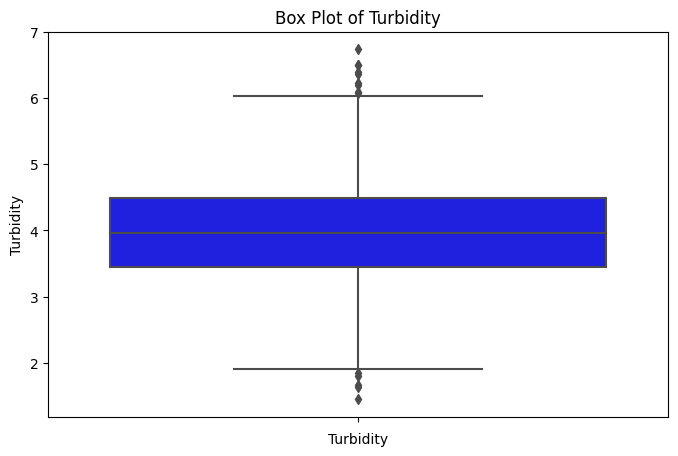

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df1[column], color='blue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df1['ph']=winsorize(df1['ph'],[0.01,0.02])
df1['Turbidity']=winsorize(df1['Turbidity'],[0.01,0.02])
df1['Hardness']=winsorize(df1['Hardness'],[0.01,0.02])
df1['Solids']=winsorize(df1['Solids'],[0.01,0.02])
df1['Chloramines']=winsorize(df1['Chloramines'],[0.01,0.02])
df1['Sulfate']=winsorize(df1['Sulfate'],[0.01,0.02])
df1['Conductivity']=winsorize(df1['Conductivity'],[0.01,0.02])
df1['Trihalomethanes']=winsorize(df1['Trihalomethanes'],[0.01,0.02])
df1['Organic_carbon']=winsorize(df1['Organic_carbon'],[0.01,0.02])

In [ ]:
def count_outliers_iqr(df, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = len(df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)])
    return num_outliers

In [ ]:
outliers_count = {}
for column in numeric_columns:
    num_outliers = count_outliers_iqr(df1, column)
    outliers_count[column] = num_outliers

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [ ]:
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in ph: 0
Number of outliers in Hardness: 34
Number of outliers in Solids: 0
Number of outliers in Chloramines: 27
Number of outliers in Sulfate: 0
Number of outliers in Conductivity: 0
Number of outliers in Organic_carbon: 0
Number of outliers in Trihalomethanes: 0
Number of outliers in Turbidity: 0


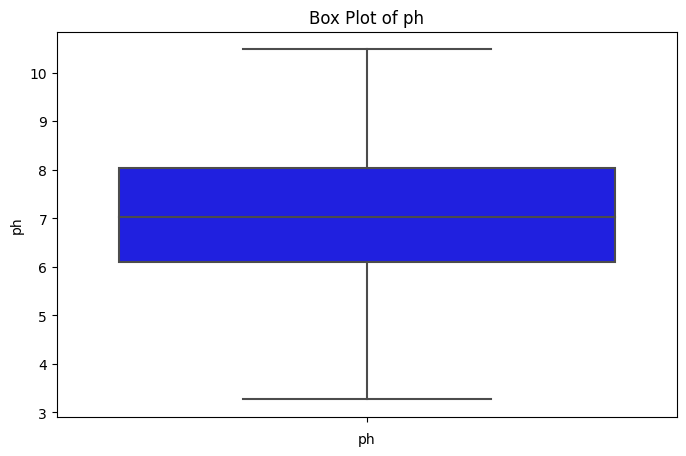

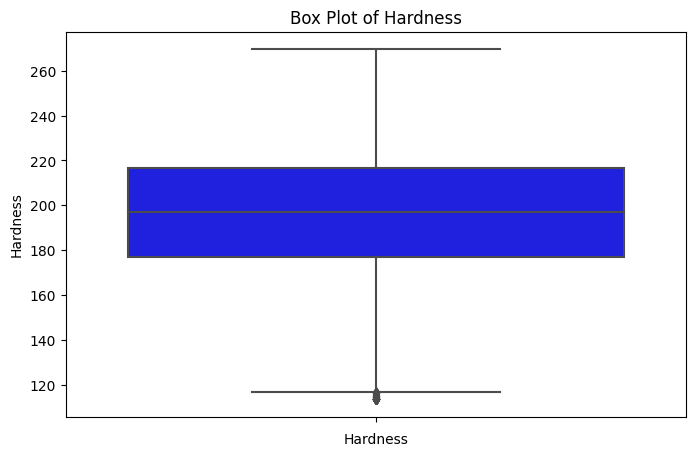

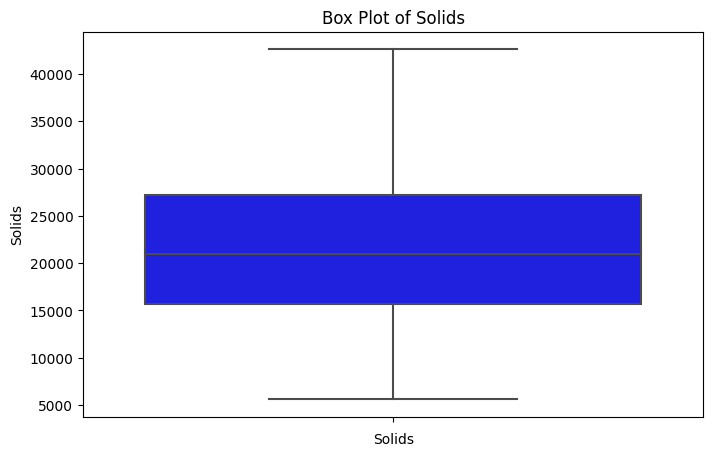

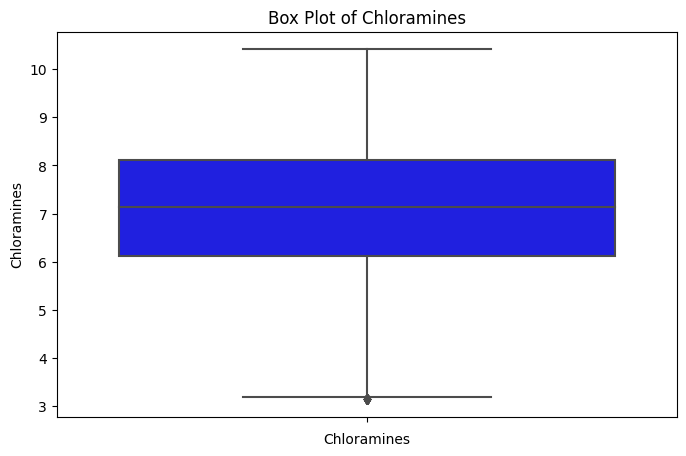

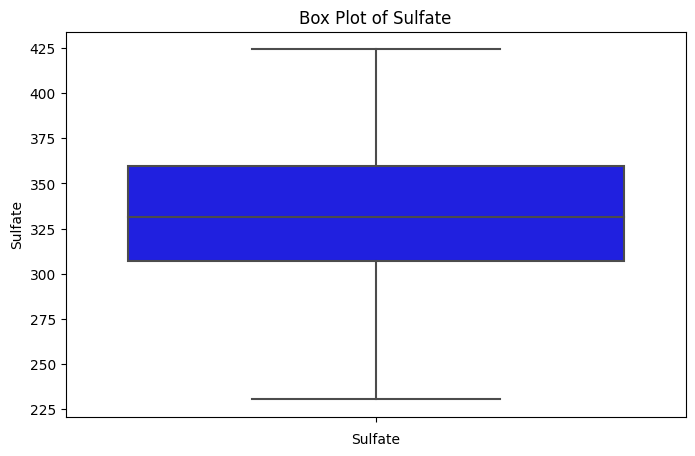

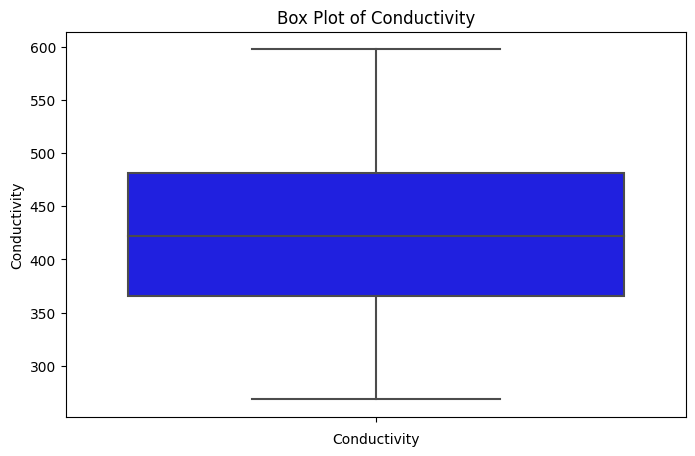

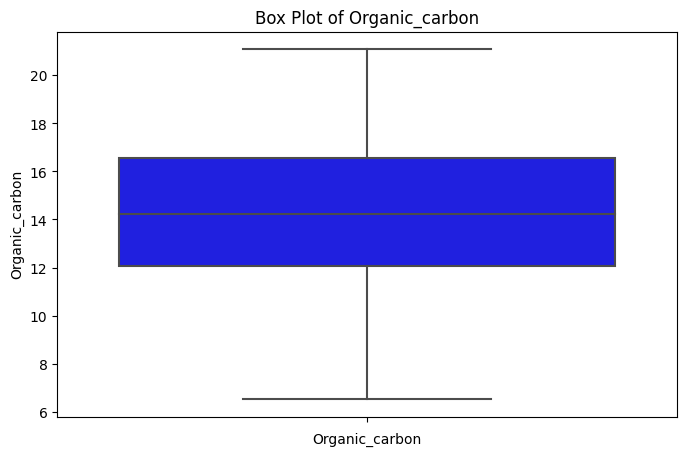

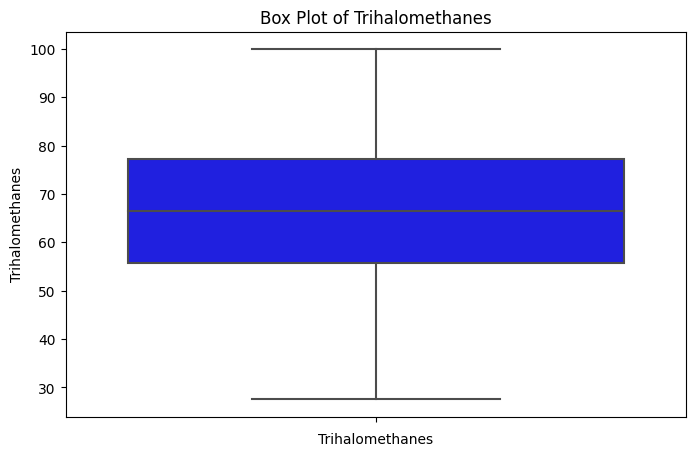

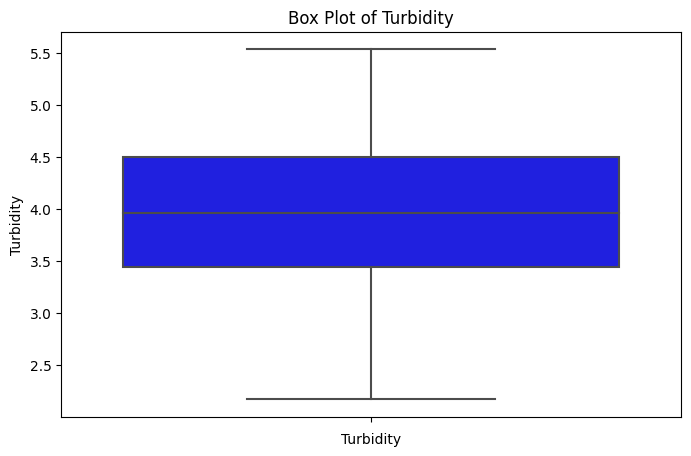

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df1[column], color='blue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
corr = df1.corr()
corr

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.113623 -0.077040    -0.021423  0.008509   
Hardness         0.113623  1.000000 -0.072850    -0.025979 -0.094894   
Solids          -0.077040 -0.072850  1.000000    -0.072097 -0.126125   
Chloramines     -0.021423 -0.025979 -0.072097     1.000000  0.032331   
Sulfate          0.008509 -0.094894 -0.126125     0.032331  1.000000   
Conductivity     0.013186 -0.018067  0.013426    -0.019054 -0.014782   
Organic_carbon   0.035421  0.010845  0.010193    -0.017007  0.050948   
Trihalomethanes  0.007100 -0.027225 -0.006704     0.011412  0.013505   
Turbidity       -0.011248 -0.007378  0.013270    -0.008524 -0.013711   
Potability      -0.030288 -0.010207  0.035015     0.014588 -0.015583   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.013186        0.035421         0.007100  -0.011248   
Hardness            -0.018067        0.010845        -0.027225  -0.007378   
Solids               0.013426        0.010193        -0.006704   0.013270   
Chloramines         -0.019054       -0.017007         0.011412  -0.008524   
Sulfate             -0.014782        0.050948         0.013505  -0.013711   
Conductivity         1.000000        0.039561         0.000444   0.003946   
Organic_carbon       0.039561        1.000000        -0.008590  -0.009501   
Trihalomethanes      0.000444       -0.008590         1.000000  -0.033030   
Turbidity            0.003946       -0.009501        -0.033030   1.000000   
Potability          -0.008894       -0.022357         0.006730   0.003539   

                 Potability  
ph                -0.030288  
Hardness          -0.010207  
Solids             0.035015  
Chloramines        0.014588  
Sulfate           -0.015583  
Conductivity      -0.008894  
Organic_carbon    -0.022357  
Trihalomethanes    0.006730  
Turbidity          0.003539  
Potability         1.000000

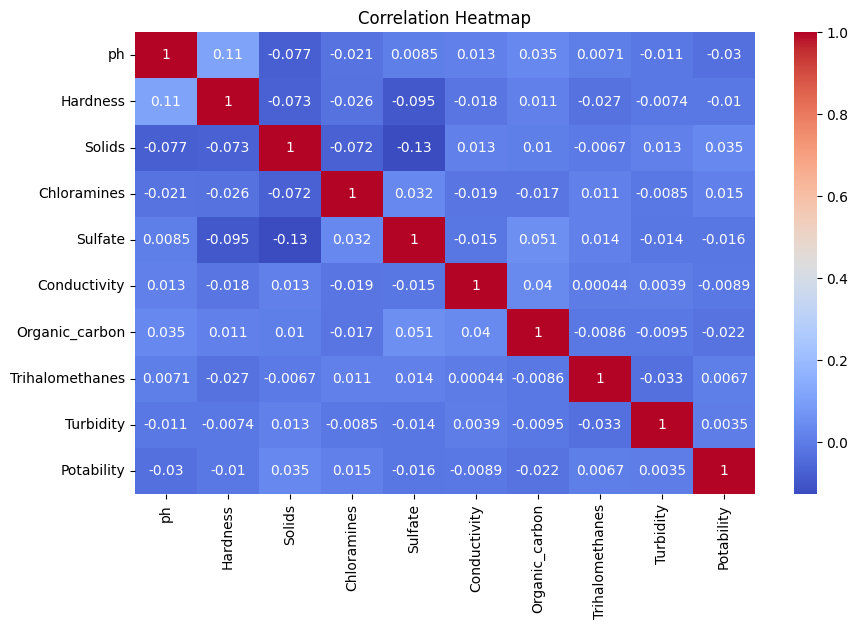

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = df1.drop(columns=['Potability','Conductivity'],axis=1)
y = df1['Potability']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
decission = DecisionTreeClassifier(criterion='log_loss',splitter='random')
decission.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', splitter='random')

In [ ]:
decission.predict(x_test)
decission.score(x,y)

0.9091603053435114

In [ ]:
clf = LogisticRegression(random_state=53)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6069


In [ ]:
testd.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
id                   int64
dtype: object

In [ ]:
testd.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  218.302176  42061.322799     6.331177  324.541596    503.139245   
1       NaN  176.413638  12674.672773     8.988477  354.768115    344.420435   
2  8.926113  189.987947  15249.620244     7.076222  341.526873    361.901628   
3  5.700785  185.922247  27365.106363     7.563100         NaN    359.506553   
4  5.771199  155.050893  24909.444010     6.531261  297.009319    313.701934   

   Organic_carbon  Trihalomethanes  Turbidity  id  
0       15.712139        48.497826   4.328026   1  
1       12.682869        83.567356   4.403877   2  
2       21.278095              NaN   2.752134   3  
3       15.089441        56.463434   3.978141   4  
4       11.704789        85.688303   4.688959   5

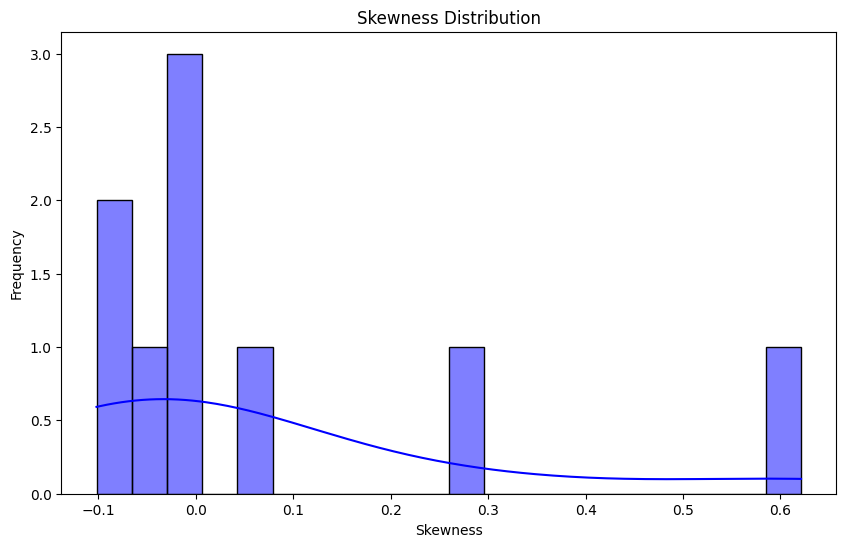

In [ ]:
skewness2 = testd.select_dtypes(include=['float64']).apply(lambda x: stats.skew(x.dropna()))
plt.figure(figsize=(10, 6))
sns.histplot(skewness2, bins=20, kde=True, color='blue')
plt.title('Skewness Distribution')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()

In [ ]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               551 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          496 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  619 non-null    float64
 8   Turbidity        656 non-null    float64
 9   id               656 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 51.4 KB


In [ ]:
testd.isnull().sum()

ph                 105
Hardness             0
Solids               0
Chloramines          0
Sulfate            160
Conductivity         0
Organic_carbon       0
Trihalomethanes     37
Turbidity            0
id                   0
dtype: int64

In [ ]:
t1=testd.fillna(method='ffill',axis=0)

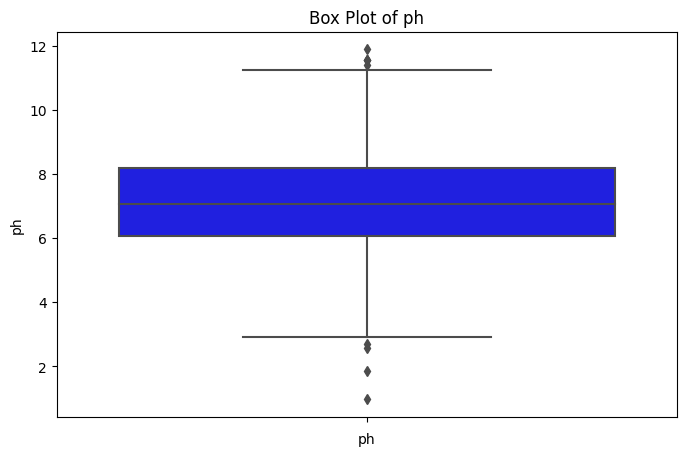

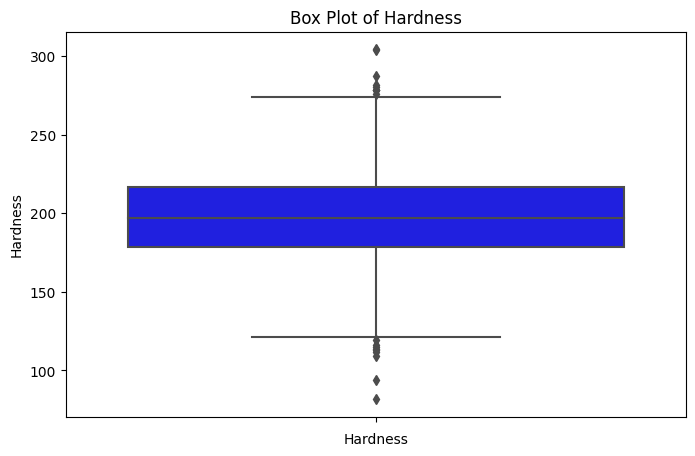

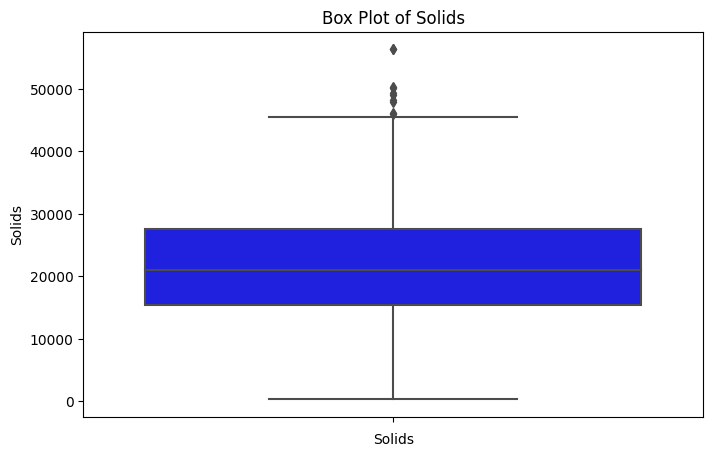

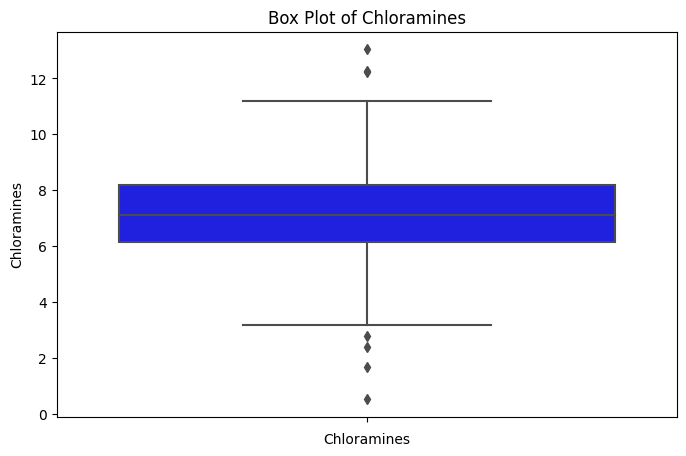

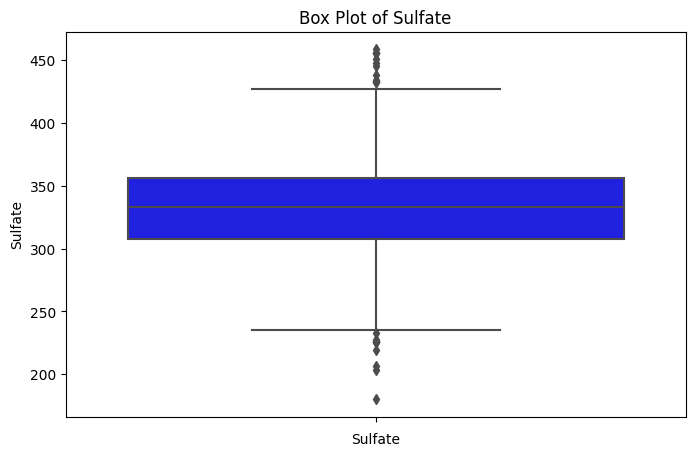

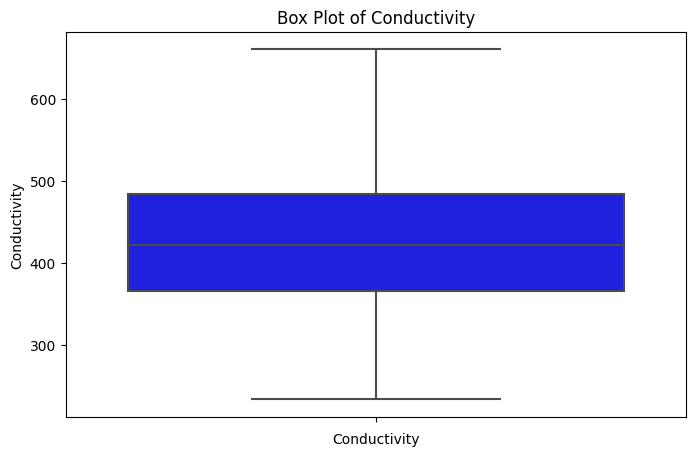

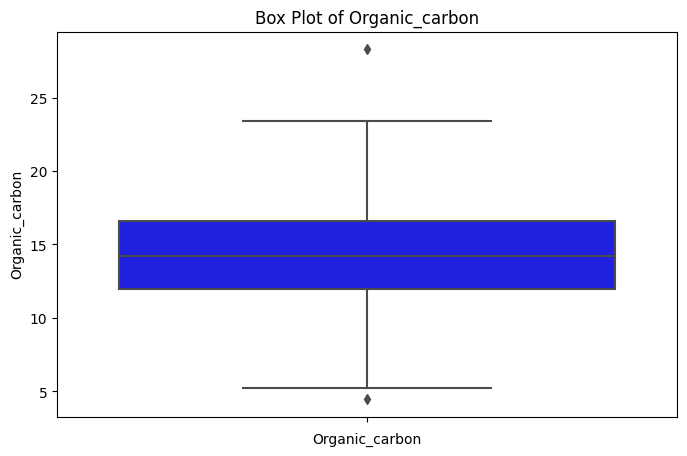

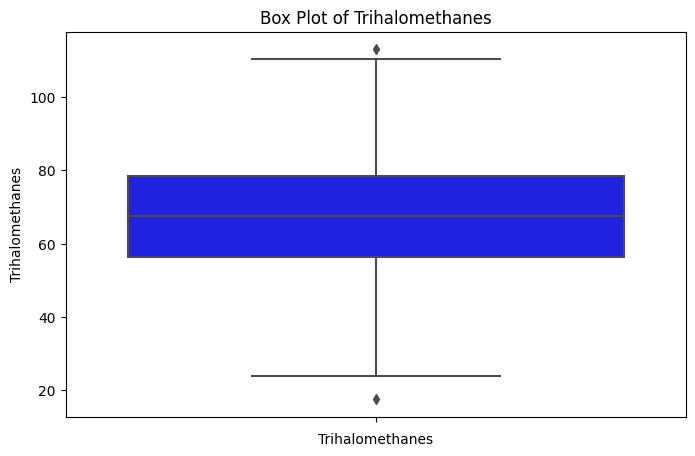

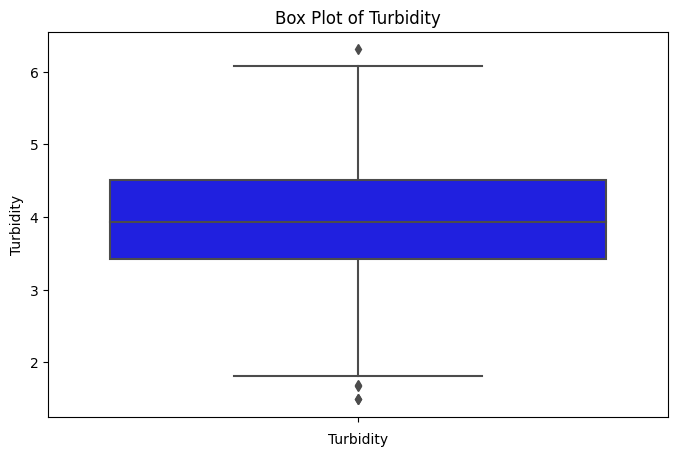

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=t1[column], color='blue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
t1['ph']=winsorize(t1['ph'],[0.01,0.02])
t1['Turbidity']=winsorize(t1['Turbidity'],[0.01,0.02])
t1['Hardness']=winsorize(t1['Hardness'],[0.01,0.02])
t1['Solids']=winsorize(t1['Solids'],[0.01,0.02])
t1['Chloramines']=winsorize(t1['Chloramines'],[0.01,0.02])
t1['Sulfate']=winsorize(t1['Sulfate'],[0.01,0.02])
t1['Conductivity']=winsorize(t1['Conductivity'],[0.01,0.02])
t1['Trihalomethanes']=winsorize(t1['Trihalomethanes'],[0.01,0.02])
t1['Organic_carbon']=winsorize(t1['Organic_carbon'],[0.01,0.02])

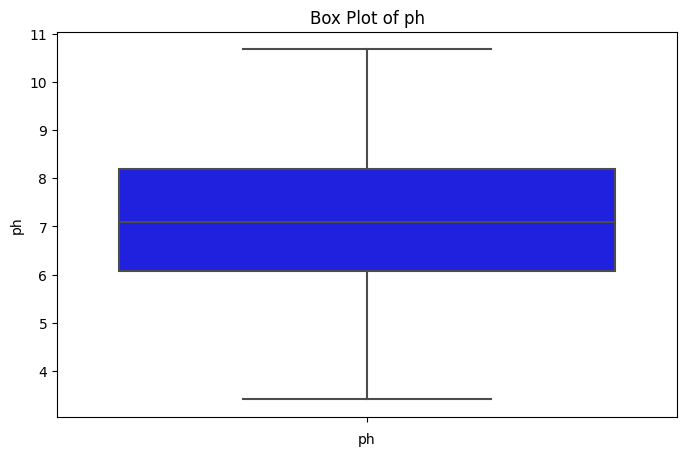

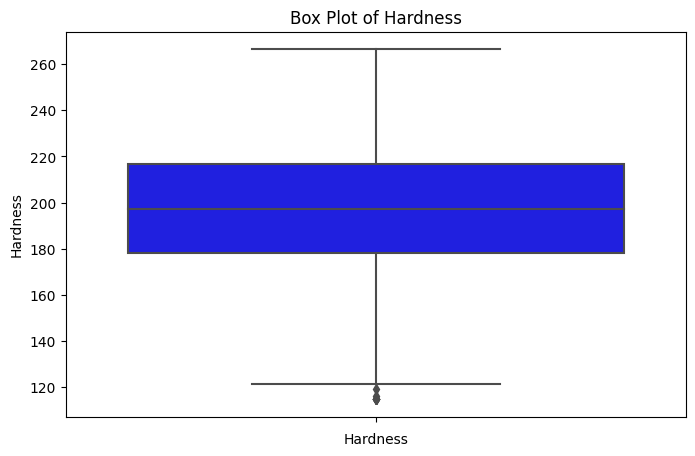

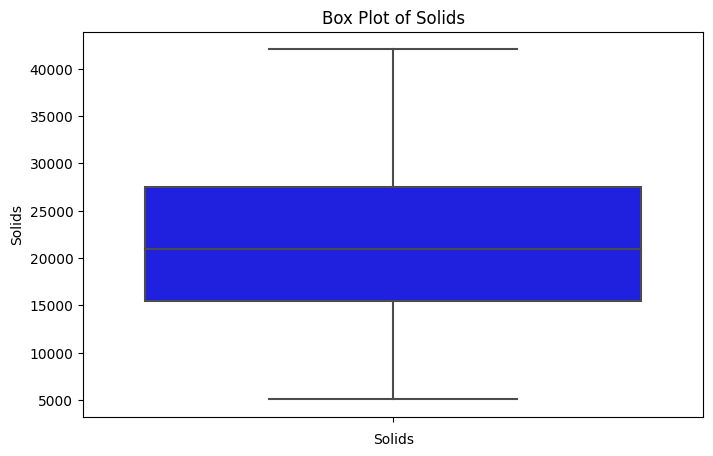

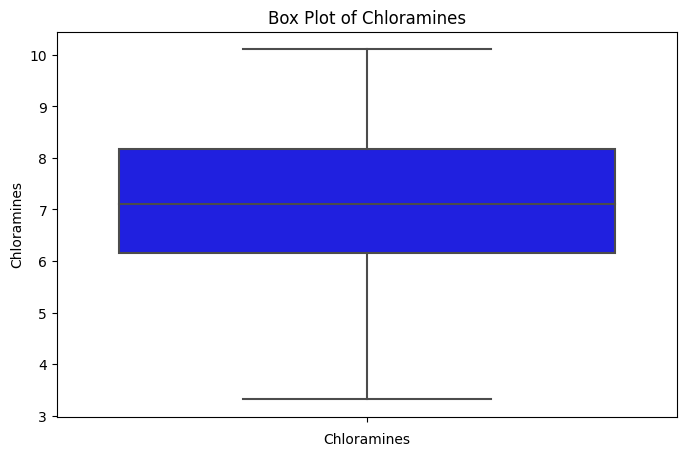

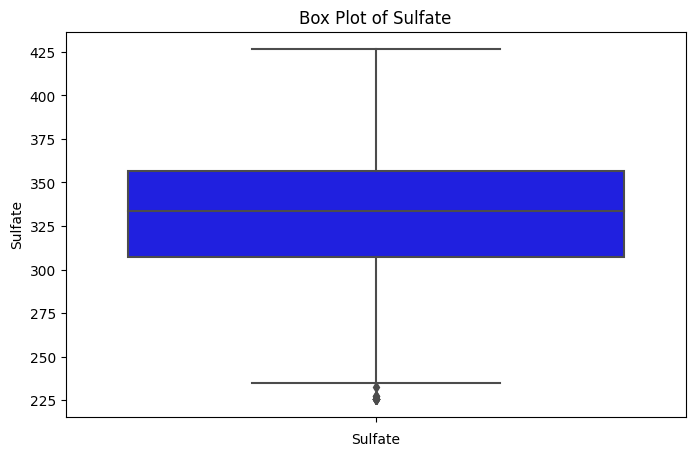

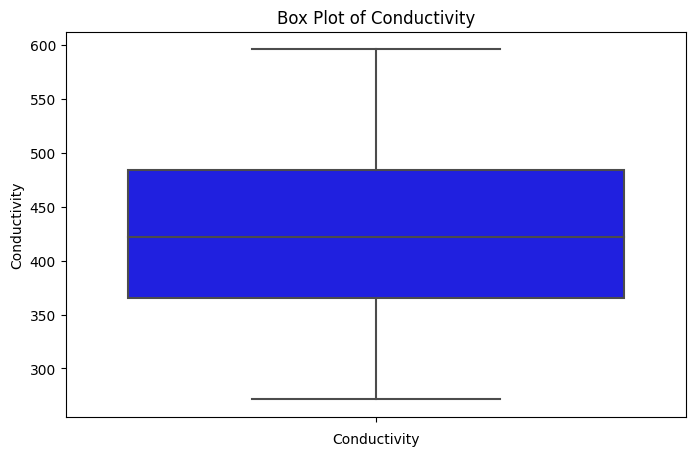

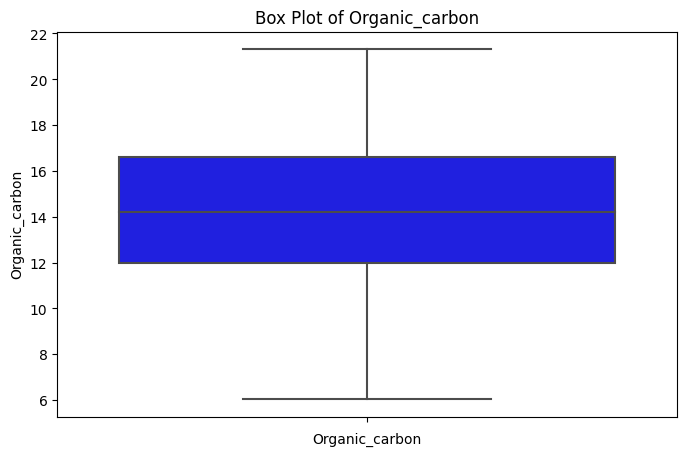

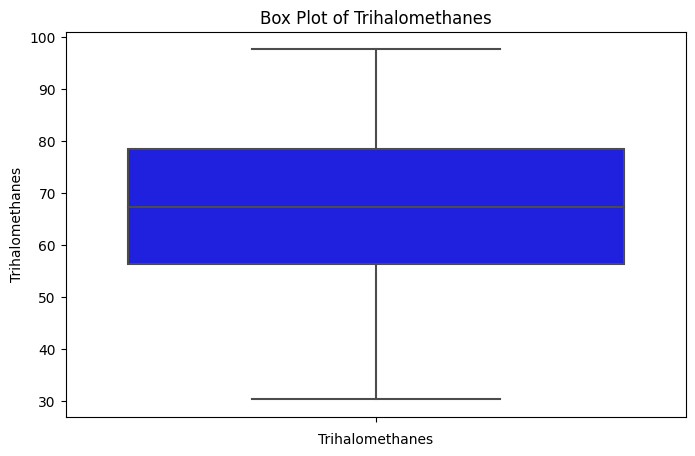

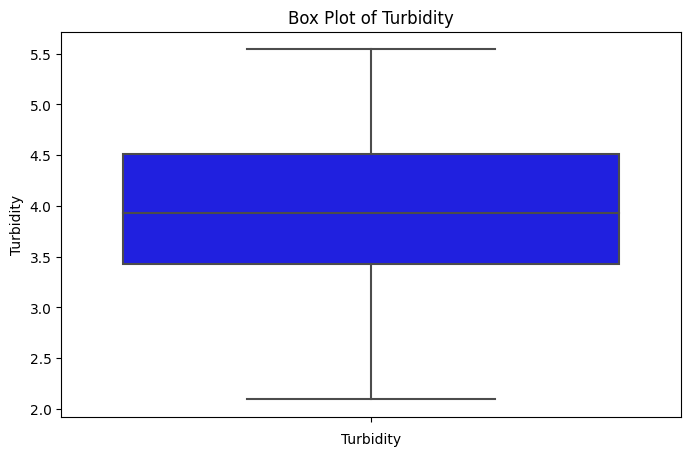

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=t1[column], color='blue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
X = t1.drop(columns=['id','Conductivity'],axis=0)
y = t1['id']

In [ ]:
td=pd.DataFrame(y)

In [ ]:
td['Potability']=pd.DataFrame(decission.predict(X))

In [ ]:
td

id  Potability
0      1           1
1      2           1
2      3           1
3      4           0
4      5           0
..   ...         ...
651  652           0
652  653           0
653  654           0
654  655           1
655  656           0

[656 rows x 2 columns]

In [ ]:
td.to_csv('result.csv',index=False)